# Logistic Regression Tutorial
### For CSE 190 - Fall 2018 <br> Author: Jenny Hamer

Logistic regression is a binary classification method where we aim to compute the probability that a given input sample (represented by a vector $x \in \mathbb{R}^d$ where $d$ is the number of features) belongs to a particular class. We can encode up to two distinct classes in this model. <br>

For example, we could build a predictive system to help investors to decide which stocks to buy based their current market value, quarterly earnings, etc. (these are the <i>features</i> of the data). If the logistic regression output for some stock $x^n$, given by sigmoid$(x^n) >= 0.5$, we interpret this as $x^n$ buying investment-worthy (and label $x^n$ with a target of $1$). Otherwise, sigmoid$(x^n) < 0.5$ and we would discourage investors from buying it (labeling $x^n$ with target of $0$). <br>

The output of logistic regression is always between 0 and 1, part of which lends it to being interpretable as an estimate of the conditional probability that $x^n$ belongs to some target class, due in part by the sigmoid function: <br>

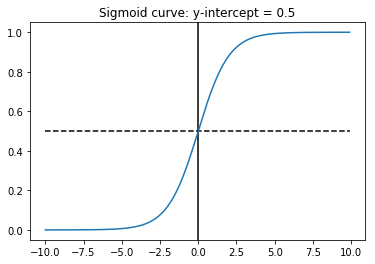

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes

def sigmoid_list(x):
    curve = []
    for elt in x:
        curve.append(1 / (1 + np.exp(- elt)))
    return curve

x = np.arange(-10, 10, 0.1)
fig = plt.figure()
plt.axvline(x=0, ymin=0, ymax=1, color="k")
plt.hlines(y=0.5, xmin=x[0], xmax=x[-1], linestyles="dashed")
plt.plot(x, sigmoid_list(x))
plt.title("Sigmoid curve: y-intercept = 0.5")
plt.show()

From the Machine Learning perspective (as opposed to the common statistical formulation), we use a powerful, iterative algorithm to approximate the solution to the Logistic Regression problem: the <b>Gradient Descent</b> algorithm.
 
To summarize the setting, we have: <br>
* Data and their labels (one label per sample in the dataset)
* An objective - or cost - function
* An activation function (the sigmoid function we saw above)
* Gradient descent
<br>

<b>Dataset:</b> <br>
Commonly represented as ${\bf X}$, an $[N \times d]$ matrix, where $N$ corresponds to the total number of samples or datapoints in the set and $d$ to the number of features (e.g. independent variables) of our data. Each of the samples $x_i \in {\bf X}$ has a binary, ground-truth label, $y_i \in \{0, 1\}$. In the event that some $x_j \in {\bf X}$ has all-zero feature values, we want to learn an "intercept" term, referred to as the <b>bias</b> - therefore, we append a column of $1's$ to the start of our data matrix ${\bf X}$.<br>

Given this dataset, our goal is to ${\it learn}$ a set of model parameters - commonly called "weights" - to accurately predict the label of any given data point. We do some through the magic of Gradient Descent!
<!-- In the stock predictor example, our features -->

Now that we have our labeled data, we move on to the objective function for Logistic Regression: <b>Cross-Entropy Loss</b>. By objective function, we mean that we want to optimize our model with respect to this function - more plainly, we want to find a set of model parameters which gets us <i>very close</i> to the global minimum of this function. You can think of this function as some "error surface" which we want to skate down until we reach the beautiful bottom - reaching this point means that our model has converged to a global solution. <br>

A key requirement for any objective function, <b>E</b> in this setting be:
* convex
* parametrized by our model parameters/weights
* is differentiable!

As a reminder, a convex function looks like this:

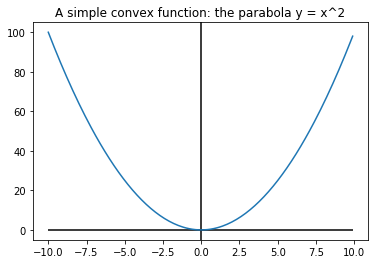

In [33]:
def convex(x):
    curve = []
    for elt in x:
        curve.append(elt ** 2)
    return curve

fig = plt.figure()
plt.axvline(x=0, ymin=0, ymax=1, color="k")
plt.hlines(y=0, xmin=x[0], xmax=x[-1])
plt.plot(x, convex(x))
plt.title("A simple convex function: the parabola y = x^2")
plt.show()

(You can find a precise definition of convexity from [Wolfram MathWorld](http://mathworld.wolfram.com/ConvexFunction.html)) <br>

Our objective function, the <b>Cross-Entropy Loss</b>, is given by: <br>
\begin{equation}
E(w) = - \sum_{n=1}^N \left\lbrace t^n \ln( y^n ) + (1 - t^n) \ln( 1 - y^n ) \right\rbrace$ <br>
\end{equation}

Now, for <b>Gradient Descent</b>!

If you dig deep in your memory back to Calculus, you may remember hearing the term "gradient". For our purposes, you can think of this as the partial derivative with respect to (w.r.t.) some variable - or simply the instantaneous rate of change (slope) of some function. For us, we care about the gradient of our cost function $E$ w.r.t. the model parameters, $w$: <br>

\begin{equation}
-\frac{\partial E(w)}{\partial w_j} = \sum_{n=1}^N (t^{n} - y^{n})x^{n}_j
\end{equation} 

where $n$ iterates over the samples in our dataset (from 1 to $N$), $t^n$ is the ground-truth target for the current data sample $x^n$, and $y^n$ is the output of the logistic function, $y^n = sigmoid(w^T x^n)$. <br> 
<b>Note:</b> that we may use the notation $\frac{\partial E(w)}{\partial w_j}$ and $\nabla_w E$ or $\nabla E$ interchangeably to denote the gradient of $E$. <br>

In order to optimize our model using this objective function, we compute its slope (gradient w.r.t. $w$) and take a small steps in the opposite direction of the slope. This is the same as taking a small step proportional to the negative of its gradient. That "smallness" of that step is largely determined by the learning rate, $\alpha < 1$ (also called "step size"). What this means is we scale down the gradient by a factor of $\alpha$ and update our weights to "move" a little closer to the minimum of this objective function. <br>


In the case of Logistic Regression, there is one global minimum since we are optimizing a convex cost function, but when we get to "Deep" Neural Networks, we'll see that there may be many local minima as well! The beauty of gradient descent is that it allows us to iteratively try to find local minima across the error surface of our objective function (giving us an approximate solution, since this may not be the "true" global minimum, if it even exists) and hopefully reach one that is close enough to optimal! <br>

## Gradient Descent Algorithm


<b>Preliminaries:</b>
* "batch gradient descent": refers to using all samples in the dataset at once to compute the gradient of $E(w)$ <br>(sometimes called "full batch gradient descent")
* $w$: a set of weights, where we have exactly one weight per feature of our dataset <br>
    (e.g. in vectorized implementation, $\vec{w}$ has dimension $[d \times 1]$)
* $w_t$ is the current weight we're considering at time $t$ - its value during *this iteration*
* $w_{t+1}$ is the updated weight value, which will be used to compute $E(w)$ during *the next iteration*
* def: epoch: one complete pass through the dataset (e.g. we've used every data point to compute $\frac{\partial E(w)}{\partial w_j}$ once
* def: <b>stochastic</b> gradient descent: compute $\frac{\partial E(w)}{\partial w_j}$ with respect to <u>one</u> sample at a time (randomized iteration over all samples $\rightarrow$ stochastic)
* def: iteration: "subloop" where we iterate over the samples until every one in the dataset until every sample has been used to compute $\frac{\partial E(w)}{\partial w_j}$ once <br> (e.g. # iterations / epoch = $\frac{\text{total # of samples}}{\text{mini-batch size}}$)



<b>Weight update rule:</b>
$w_{t+1} \leftarrow w_t - \alpha \sum_{n=1}^N \frac{\partial E(w)}{\partial w}$


For now, think of this rule as updating the value of <i>one weight</i> (corrsponding to one data feature) at a time. We may vectorize this approach later for computational efficiency through parallelism and optimized matrix/vector operations, but it's easier to build intuition in the simplified setting first. Please pause and work through a small example substituting the derivative of $E(w)$ given above to update the weight for a single $w_j$ (note the matrix/vector dimension compatibility requirements for this update rule to be well-defined - it will help you when you code the algorithm!).

<b>(Full) Batch Gradient Descent:</b> <br>
\# Use <i>all samples</i> at once to compute $\nabla E(w)$
1. Initialize weights $w \gets 0$   (initialize weights to zero)
2. Let J = num_epochs
3. For $t$ from 0 to J (or until convergence): 
    4. $w_{t+1} \leftarrow w_t - \alpha \sum_{n=1}^N \nabla E^n(w)$

In <b>batch</b> gradient descent, note that we're using all $N$ samples to compute the gradient <i> before</i> updating the weights.



<b>Stochastic Gradient Descent:</b> <br>
\# Use <i>one sample</i> at a time to approximate $\nabla E(w)$
1. Initialize weights $w \gets 0$    (initialize weights to zero)
2. Randomly shuffle / randomize the training set $X$ and let J = num_epochs

3. For $t$ from 0 to J (or until convergence): 
    4. For $n$ from 1 to N: 
        5. $w_{t+1} \leftarrow w_t - \alpha \nabla E^n(w)$

In <b>stochastic</b> gradient descent, note that we're using only one sample at a time to estimate the gradient and update the weight after "seeing" each sample. The motivation behind this is that datasets contain a lot of repetition and therefore we may not necessarily need to consider each sample to move towards the optimum solution. In fact, it's possible that our solution may converge more quickly compared to full batch G.D., but will do so more noisily (you will see more spikes in the error when tracking it after each iteration). <br> <br>


We will visit this in the coming couple of weeks, but a more practical and smoother method is to use "mini-batches". These are subsets of your training data which you approximate $\nabla E(w)$ with at each iteration and are often between $16$ and $1024$ in size (CS folks have a tendancy to favor powers of 2, but this is not a necessary condition). This process exhibits a nice trade-off between the two previous approaches: optimized matrix/vector operations and parallelism are available to improve computational complexity, convergence is typically smoother, and a lower, but still present level of stochasticity helps the rate of convergence at a reduced computational overhead compared to full-batch G.D.


# Softmax Regression

Softmax Regression is a generalization of Logistic Regression from binary to multiclass classification where the number of classes $C > 2$. The <b>Softmax</b> activation function essentially computes the probability distribution of a particular example belonging to each one of the $C_i$ classes. The "soft" part refers to the resulting output which is interpreted as a probability as opposed to a "hard" classification. <br> 

Consider this example: our softmax output for a sample $x^n$ is given by $y_i^n = P(C_i | x^n) = 0.65$ tells us that our model "thinks" $x^n$ has a $\approx 65\%$ probability of belonging in class $C_i$, but there is a remaining $35\%$ probability spread over the remaining classes which $x^n$ could belong to. On the other hand, hard classification is discrete where class assignment is of the form $P(C_i | x^n) = 1$ for some class $C_i$. <br>


Given the softmax activation function, 





<!-- On the other hand, if we were to use some thresholding to say: <br>


$y_i =\begin{cases}
1 & \mbox{if \ensuremath{\sum_{i=0}^{d}w_{i}x_{i}\geqslant0}}\\
0 & \mbox{else}
\end{cases}

\$P(C_i | x^n) >= 0.50 \implies P(C_i | x^n) y_i^n = C_i, otherwise y_i^n = 0$ 

. This is a e use is called <b>Softmax</b> because we are  -->